In [33]:
#import libraries
import requests, zipfile
import pandas as pd
import io
import os
import numpy as np 
import tensorflow as tf
from matplotlib import pyplot as plt
from io import StringIO
import itertools as it
from datetime import datetime
import sklearn as sklearn
np.set_printoptions(threshold=sys.maxsize)
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [34]:
#declare global variables 
daily_monthly = 'daily'
time_lapse = '4h'
bitcoin_par = 'BTCBUSD'
year_2022 = '2022-'
year_2023 = '2023-'
url = 'https://data.binance.vision/data/spot/'+daily_monthly+'/klines/'+bitcoin_par+'/'+time_lapse+'/'+bitcoin_par+'-'+time_lapse+'-'
zip = '.zip'
#https://data.binance.vision/data/spot/daily/klines/BTCBUSD/4h/BTCBUSD-4h-
print(url)

https://data.binance.vision/data/spot/daily/klines/BTCBUSD/4h/BTCBUSD-4h-


In [114]:
'''
x = np.array([], dtype=np.uint32)
y = np.array([], dtype=np.uint32)
#download the data and unzip
try:
    for year_loop in range(2021, 2024):
        for month_loop in range(1, 13):
            if month_loop in (1,3,5,7,8,10,12):
                days_range = 32
            elif month_loop in (4,6,9,11):
                days_range = 31
            else:
                days_range = 29
            month_inloop =  '0'+str(month_loop) if month_loop < 10 else str(month_loop)
            for day_loop in range(1, days_range):#days_range
                day_inloop = '0'+str(day_loop) if day_loop < 10 else str(day_loop)
                url_loop = url+str(year_loop)+'-'+str(month_inloop)+'-'+str(day_inloop)+zip
                #print(url_loop)
                #requeset info from binance
                #req_loop = requests.get(url_loop, stream=True)
                #print(req_loop.status_code)
                if  ((year_loop  >= 2021 and month_loop >= 3)):#and (year_loop <= 2023 and month_loop <= 1 and day_loop <= 5)
                    #z = zipfile.ZipFile(io.BytesIO(req_loop.content))
                    #z.extractall(os.path.join(os.getcwd(), 'data-btc'))
                    csv_name_loop = bitcoin_par+'-'+time_lapse+'-'+str(year_loop)+'-'+str(month_inloop)+'-'+str(day_inloop)+'.csv'
                    print(csv_name_loop)
                    df  =    pd.read_csv(os.path.join(os.getcwd(), 'data-btc', csv_name_loop)
                    , header = None
                    , names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'ignore'])
                    x_time = df[['Open time']].to_numpy(dtype = np.float32)
                    x = np.append(x, x_time)
                    y_price_high = df[['High']].to_numpy(dtype = np.float32)
                    y_price_close = df[['Low']].to_numpy(dtype = np.float32)
                    y_promedio = np.add(y_price_high, y_price_close)
                    y_promedio =  y_promedio/2
                    y = np.append(y, y_promedio)
except:
    print("Error")
#print(df.shape)
#df.head
'''


'\nx = np.array([], dtype=np.uint32)\ny = np.array([], dtype=np.uint32)\n#download the data and unzip\ntry:\n    for year_loop in range(2021, 2024):\n        for month_loop in range(1, 13):\n            if month_loop in (1,3,5,7,8,10,12):\n                days_range = 32\n            elif month_loop in (4,6,9,11):\n                days_range = 31\n            else:\n                days_range = 29\n            month_inloop =  \'0\'+str(month_loop) if month_loop < 10 else str(month_loop)\n            for day_loop in range(1, days_range):#days_range\n                day_inloop = \'0\'+str(day_loop) if day_loop < 10 else str(day_loop)\n                url_loop = url+str(year_loop)+\'-\'+str(month_inloop)+\'-\'+str(day_inloop)+zip\n                #print(url_loop)\n                #requeset info from binance\n                #req_loop = requests.get(url_loop, stream=True)\n                #print(req_loop.status_code)\n                if  ((year_loop  >= 2021 and month_loop >= 3)):#and (yea

In [35]:
x = np.array([], dtype=np.uint32)
y = np.array([], dtype=np.uint32)
#download and charge 2021 from month 3 to month 12
for month_loop in range (3, 12):
    if month_loop in (1,3,5,7,8,10,12):
        days_range = 32
    elif month_loop in (4,6,9,11):
        days_range = 31
    else:
        days_range = 29
    month_inloop =  '0'+str(month_loop) if month_loop < 10 else str(month_loop)
    for day_loop in range(1, days_range):#days_range
        day_inloop = '0'+str(day_loop) if day_loop < 10 else str(day_loop)
        url_loop = url+str(2021)+'-'+str(month_inloop)+'-'+str(day_inloop)+zip
        #print(url_loop)
        #requeset info from binance
        #req_loop = requests.get(url_loop, stream=True)
        #print(req_loop.status_code)
        #z = zipfile.ZipFile(io.BytesIO(req_loop.content))
        #z.extractall(os.path.join(os.getcwd(), 'data-btc'))
        csv_name_loop = bitcoin_par+'-'+time_lapse+'-'+str(2021)+'-'+str(month_inloop)+'-'+str(day_inloop)+'.csv'
        #print(csv_name_loop)
        df  =    pd.read_csv(os.path.join(os.getcwd(), 'data-btc', csv_name_loop)
        , header = None
        , names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'ignore'])
        x_time = df[['Open time']].to_numpy(dtype = np.float32)
        x = np.append(x, x_time)
        y_price_high = df[['High']].to_numpy(dtype = np.float32)
        y_price_close = df[['Low']].to_numpy(dtype = np.float32)
        y_promedio = np.add(y_price_high, y_price_close)
        y_promedio =  y_promedio/2
        y = np.append(y, y_promedio)
        
#download and charge 2022 all the motnhs
for month_loop in range (1, 12):
    if month_loop in (1,3,5,7,8,10,12):
        days_range = 32
    elif month_loop in (4,6,9,11):
        days_range = 31
    else:
        days_range = 29
    month_inloop =  '0'+str(month_loop) if month_loop < 10 else str(month_loop)
    for day_loop in range(1, days_range):#days_range
        day_inloop = '0'+str(day_loop) if day_loop < 10 else str(day_loop)
        url_loop = url+str(2022)+'-'+str(month_inloop)+'-'+str(day_inloop)+zip
        #print(url_loop)
        #requeset info from binance
        #req_loop = requests.get(url_loop, stream=True)
        #print(req_loop.status_code)
        #z = zipfile.ZipFile(io.BytesIO(req_loop.content))
        #z.extractall(os.path.join(os.getcwd(), 'data-btc'))
        csv_name_loop = bitcoin_par+'-'+time_lapse+'-'+str(2022)+'-'+str(month_inloop)+'-'+str(day_inloop)+'.csv'
        #print(csv_name_loop)
        df  =    pd.read_csv(os.path.join(os.getcwd(), 'data-btc', csv_name_loop)
        , header = None
        , names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'ignore'])
        x_time = df[['Open time']].to_numpy(dtype = np.float32)
        x = np.append(x, x_time)
        y_price_high = df[['High']].to_numpy(dtype = np.float32)
        y_price_close = df[['Low']].to_numpy(dtype = np.float32)
        y_promedio = np.add(y_price_high, y_price_close)
        y_promedio =  y_promedio/2
        y = np.append(y, y_promedio)
#download and charge 2023 in order of the days 
for month_loop in range (1, 2):
    if month_loop in (1,3,5,7,8,10,12):
        days_range = 32
    elif month_loop in (4,6,9,11):
        days_range = 31
    else:
        days_range = 29
    month_inloop =  '0'+str(month_loop) if month_loop < 10 else str(month_loop)
    for day_loop in range(1, 8):#days_range
        day_inloop = '0'+str(day_loop) if day_loop < 10 else str(day_loop)
        url_loop = url+str(2023)+'-'+str(month_inloop)+'-'+str(day_inloop)+zip
        #print(url_loop)
        #requeset info from binance
        req_loop = requests.get(url_loop, stream=True)
        print(req_loop.status_code)
        z = zipfile.ZipFile(io.BytesIO(req_loop.content))
        z.extractall(os.path.join(os.getcwd(), 'data-btc'))
        csv_name_loop = bitcoin_par+'-'+time_lapse+'-'+str(2023)+'-'+str(month_inloop)+'-'+str(day_inloop)+'.csv'
        #print(csv_name_loop)
        df  =    pd.read_csv(os.path.join(os.getcwd(), 'data-btc', csv_name_loop)
        , header = None
        , names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'ignore'])
        x_time = df[['Open time']].to_numpy(dtype = np.float32)
        x = np.append(x, x_time)
        y_price_high = df[['High']].to_numpy(dtype = np.float32)
        y_price_close = df[['Low']].to_numpy(dtype = np.float32)
        y_promedio = np.add(y_price_high, y_price_close)
        y_promedio =  y_promedio/2
        y = np.append(y, y_promedio)



last_date = datetime.now()
unix_last_date = datetime.timestamp(last_date)*1000
print(x[-1], unix_last_date)
req_bin_today = requests.get('https://api.binance.com/api/v3/avgPrice?symbol=BTCUSDT', stream=True)
last_price = req_bin_today.json()['price']
print(y[-1], last_price)
x = np.append(x, np.array(unix_last_date))
y = np.append(y, np.array(last_price, dtype = np.float32))
print(last_price)
print(y.shape, x.shape)



200
200
200
200
200
200
200
1673121628160.0 1673203540290.552
16936.51953125 16928.93369893
16928.93369893
(3697,) (3697,)


In [36]:
df_scal = pd.DataFrame(y)
scaler = MinMaxScaler(feature_range=(0,1))
y_close=scaler.fit_transform(np.array(df_scal).reshape(-1,1))

(3697,)


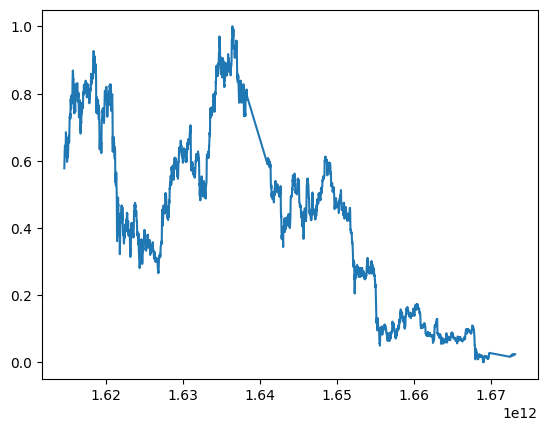

In [37]:
print(y.shape)
#plt.plot(x, y)
plt.plot(x, y_close)
plt.show()

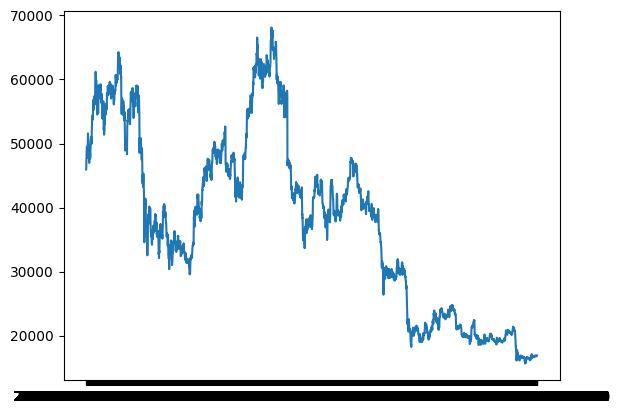

In [38]:
def cast_time_data(np_array):
    x_new_time = []
    for time_unix in np_array:
        new_time = int(str(time_unix)[0:10])
        unixToDatetime = datetime.fromtimestamp(new_time).strftime('%Y-%m-%d %H:%M:%S')
        x_new_time.append(unixToDatetime)
    return np.array(x_new_time)
x_new_time = cast_time_data(x)
plt.plot(x_new_time, scaler.inverse_transform(y_close))
plt.show()

In [47]:
def prepare_y_series(np_array, series_size = 26):
    x_series = []
    y_series = []
    for y_val in range(len(np_array)-series_size):
        x_series.append([[a] for a in np_array[y_val:y_val+series_size]])
        y_series.append(np_array[y_val+series_size])
        #print(np_array[y_val+series_size])
    #print(np.array(y_series))
    return np.array(x_series), np.array(y_series)
x_series_def, y_series_def = prepare_y_series(y_close)
#prepare_data_in_percentage
nint_perc = int(len(x_series_def)*.90)
nintfive_perc = int(len(x_series_def)*.95)
hun_perc = int(len(x_series_def)*1.0)
x_train, y_train = x_series_def[:nint_perc], y_series_def[:nint_perc]
x_valid, y_valid = x_series_def[nint_perc:hun_perc], y_series_def[nint_perc:hun_perc]
x_test, y_test = x_series_def[nintfive_perc:hun_perc], y_series_def[nintfive_perc:hun_perc]
x_plt_train = x[:nint_perc]
x_plt_valid = x[nint_perc:nintfive_perc]
x_plt_test = x[nintfive_perc:hun_perc]

In [48]:
#new maderfucking model
mamfmodel = tf.keras.models.Sequential()
mamfmodel.add(tf.keras.layers.InputLayer((26, 1)))
mamfmodel.add(tf.keras.layers.LSTM(units = 64))
mamfmodel.add(tf.keras.layers.Dense(8, 'relu'))
mamfmodel.add(tf.keras.layers.Dense(1, 'linear'))
mamfmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [49]:
cp = tf.keras.callbacks.ModelCheckpoint('mamfmodel/', save_best_only=True)
mamfmodel.compile(loss='mean_squared_error', optimizer='adam',metrics= tf.keras.metrics.RootMeanSquaredError())
mamfmodel.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, callbacks=[cp])

Epoch 1/100
104/104 [==============================] - ETA: 0s - loss: 0.0180 - root_mean_squared_error: 0.1343

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 6s 35ms/step - loss: 0.0180 - root_mean_squared_error: 0.1343 - val_loss: 1.9764e-04 - val_root_mean_squared_error: 0.0141
Epoch 2/100
 96/104 [==========================>...] - ETA: 0s - loss: 6.3971e-04 - root_mean_squared_error: 0.0253

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 6.3571e-04 - root_mean_squared_error: 0.0252 - val_loss: 5.7967e-05 - val_root_mean_squared_error: 0.0076
Epoch 3/100
104/104 [==============================] - 1s 7ms/step - loss: 5.7357e-04 - root_mean_squared_error: 0.0239 - val_loss: 1.5787e-04 - val_root_mean_squared_error: 0.0126
Epoch 4/100
104/104 [==============================] - 1s 7ms/step - loss: 4.7476e-04 - root_mean_squared_error: 0.0218 - val_loss: 7.7510e-05 - val_root_mean_squared_error: 0.0088
Epoch 5/100
100/104 [===========================>..] - ETA: 0s - loss: 4.3035e-04 - root_mean_squared_error: 0.0207

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 4.3761e-04 - root_mean_squared_error: 0.0209 - val_loss: 4.2211e-05 - val_root_mean_squared_error: 0.0065
Epoch 6/100
 98/104 [===========================>..] - ETA: 0s - loss: 4.5014e-04 - root_mean_squared_error: 0.0212

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 32ms/step - loss: 4.4023e-04 - root_mean_squared_error: 0.0210 - val_loss: 3.7291e-05 - val_root_mean_squared_error: 0.0061
Epoch 7/100
104/104 [==============================] - 1s 8ms/step - loss: 3.7934e-04 - root_mean_squared_error: 0.0195 - val_loss: 5.4293e-05 - val_root_mean_squared_error: 0.0074
Epoch 8/100
 99/104 [===========================>..] - ETA: 0s - loss: 4.2856e-04 - root_mean_squared_error: 0.0207

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 4s 39ms/step - loss: 4.2030e-04 - root_mean_squared_error: 0.0205 - val_loss: 3.7110e-05 - val_root_mean_squared_error: 0.0061
Epoch 9/100
100/104 [===========================>..] - ETA: 0s - loss: 3.4480e-04 - root_mean_squared_error: 0.0186

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 34ms/step - loss: 3.6258e-04 - root_mean_squared_error: 0.0190 - val_loss: 3.1417e-05 - val_root_mean_squared_error: 0.0056
Epoch 10/100
104/104 [==============================] - 1s 7ms/step - loss: 3.5674e-04 - root_mean_squared_error: 0.0189 - val_loss: 3.3665e-05 - val_root_mean_squared_error: 0.0058
Epoch 11/100
 99/104 [===========================>..] - ETA: 0s - loss: 3.3052e-04 - root_mean_squared_error: 0.0182

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 3.3438e-04 - root_mean_squared_error: 0.0183 - val_loss: 2.8750e-05 - val_root_mean_squared_error: 0.0054
Epoch 12/100
104/104 [==============================] - 1s 7ms/step - loss: 3.1462e-04 - root_mean_squared_error: 0.0177 - val_loss: 4.1562e-05 - val_root_mean_squared_error: 0.0064
Epoch 13/100
104/104 [==============================] - 1s 7ms/step - loss: 3.3430e-04 - root_mean_squared_error: 0.0183 - val_loss: 2.9689e-05 - val_root_mean_squared_error: 0.0054
Epoch 14/100
104/104 [==============================] - 1s 7ms/step - loss: 2.8747e-04 - root_mean_squared_error: 0.0170 - val_loss: 2.9398e-05 - val_root_mean_squared_error: 0.0054
Epoch 15/100
104/104 [==============================] - 1s 7ms/step - loss: 2.7754e-04 - root_mean_squared_error: 0.0167 - val_loss: 4.6441e-05 - val_root_mean_squared_error: 0.0068
Epoch 16/100
 98/104 [===========================>..] - ETA: 0s - loss: 2.7168e-04 - root_mean_squared

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 2.7256e-04 - root_mean_squared_error: 0.0165 - val_loss: 2.3705e-05 - val_root_mean_squared_error: 0.0049
Epoch 17/100
100/104 [===========================>..] - ETA: 0s - loss: 2.6531e-04 - root_mean_squared_error: 0.0163

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 2.6334e-04 - root_mean_squared_error: 0.0162 - val_loss: 2.2094e-05 - val_root_mean_squared_error: 0.0047
Epoch 18/100
104/104 [==============================] - 1s 7ms/step - loss: 2.5126e-04 - root_mean_squared_error: 0.0159 - val_loss: 4.7154e-05 - val_root_mean_squared_error: 0.0069
Epoch 19/100
104/104 [==============================] - 1s 7ms/step - loss: 2.9043e-04 - root_mean_squared_error: 0.0170 - val_loss: 2.9695e-05 - val_root_mean_squared_error: 0.0054
Epoch 20/100
104/104 [==============================] - 1s 7ms/step - loss: 2.2970e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.3717e-05 - val_root_mean_squared_error: 0.0049
Epoch 21/100
101/104 [============================>.] - ETA: 0s - loss: 2.2104e-04 - root_mean_squared_error: 0.0149

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 4s 41ms/step - loss: 2.1920e-04 - root_mean_squared_error: 0.0148 - val_loss: 1.9651e-05 - val_root_mean_squared_error: 0.0044
Epoch 22/100
104/104 [==============================] - 1s 7ms/step - loss: 2.2138e-04 - root_mean_squared_error: 0.0149 - val_loss: 2.0474e-05 - val_root_mean_squared_error: 0.0045
Epoch 23/100
104/104 [==============================] - 1s 8ms/step - loss: 2.2818e-04 - root_mean_squared_error: 0.0151 - val_loss: 2.6847e-05 - val_root_mean_squared_error: 0.0052
Epoch 24/100
104/104 [==============================] - 1s 7ms/step - loss: 2.0752e-04 - root_mean_squared_error: 0.0144 - val_loss: 3.1400e-05 - val_root_mean_squared_error: 0.0056
Epoch 25/100
102/104 [============================>.] - ETA: 0s - loss: 2.0407e-04 - root_mean_squared_error: 0.0143

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 2.0393e-04 - root_mean_squared_error: 0.0143 - val_loss: 1.9170e-05 - val_root_mean_squared_error: 0.0044
Epoch 26/100
104/104 [==============================] - 1s 7ms/step - loss: 2.1480e-04 - root_mean_squared_error: 0.0147 - val_loss: 2.8221e-05 - val_root_mean_squared_error: 0.0053
Epoch 27/100
102/104 [============================>.] - ETA: 0s - loss: 2.2341e-04 - root_mean_squared_error: 0.0149

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 2.2211e-04 - root_mean_squared_error: 0.0149 - val_loss: 1.7520e-05 - val_root_mean_squared_error: 0.0042
Epoch 28/100
101/104 [============================>.] - ETA: 0s - loss: 1.9000e-04 - root_mean_squared_error: 0.0138

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 32ms/step - loss: 1.8999e-04 - root_mean_squared_error: 0.0138 - val_loss: 1.7414e-05 - val_root_mean_squared_error: 0.0042
Epoch 29/100
104/104 [==============================] - 1s 8ms/step - loss: 1.7613e-04 - root_mean_squared_error: 0.0133 - val_loss: 1.7997e-05 - val_root_mean_squared_error: 0.0042
Epoch 30/100
100/104 [===========================>..] - ETA: 0s - loss: 2.0103e-04 - root_mean_squared_error: 0.0142

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 4s 40ms/step - loss: 2.0025e-04 - root_mean_squared_error: 0.0142 - val_loss: 1.5504e-05 - val_root_mean_squared_error: 0.0039
Epoch 31/100
104/104 [==============================] - 1s 7ms/step - loss: 1.6620e-04 - root_mean_squared_error: 0.0129 - val_loss: 1.5755e-05 - val_root_mean_squared_error: 0.0040
Epoch 32/100
 98/104 [===========================>..] - ETA: 0s - loss: 1.7368e-04 - root_mean_squared_error: 0.0132

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 1.7366e-04 - root_mean_squared_error: 0.0132 - val_loss: 1.3984e-05 - val_root_mean_squared_error: 0.0037
Epoch 33/100
104/104 [==============================] - 1s 7ms/step - loss: 1.8707e-04 - root_mean_squared_error: 0.0137 - val_loss: 1.6068e-05 - val_root_mean_squared_error: 0.0040
Epoch 34/100
104/104 [==============================] - 1s 7ms/step - loss: 1.6796e-04 - root_mean_squared_error: 0.0130 - val_loss: 2.9849e-05 - val_root_mean_squared_error: 0.0055
Epoch 35/100
104/104 [==============================] - 1s 8ms/step - loss: 1.5953e-04 - root_mean_squared_error: 0.0126 - val_loss: 2.0652e-05 - val_root_mean_squared_error: 0.0045
Epoch 36/100
104/104 [==============================] - 1s 7ms/step - loss: 1.7601e-04 - root_mean_squared_error: 0.0133 - val_loss: 1.5308e-05 - val_root_mean_squared_error: 0.0039
Epoch 37/100
104/104 [==============================] - 1s 7ms/step - loss: 1.6148e-04 - root_mean_squ

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 1.6542e-04 - root_mean_squared_error: 0.0129 - val_loss: 1.2156e-05 - val_root_mean_squared_error: 0.0035
Epoch 41/100
104/104 [==============================] - 1s 7ms/step - loss: 1.4804e-04 - root_mean_squared_error: 0.0122 - val_loss: 2.5137e-05 - val_root_mean_squared_error: 0.0050
Epoch 42/100
101/104 [============================>.] - ETA: 0s - loss: 1.4280e-04 - root_mean_squared_error: 0.0119

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 1.4240e-04 - root_mean_squared_error: 0.0119 - val_loss: 1.1381e-05 - val_root_mean_squared_error: 0.0034
Epoch 43/100
104/104 [==============================] - 1s 7ms/step - loss: 1.5763e-04 - root_mean_squared_error: 0.0126 - val_loss: 1.3096e-05 - val_root_mean_squared_error: 0.0036
Epoch 44/100
104/104 [==============================] - 1s 7ms/step - loss: 1.4111e-04 - root_mean_squared_error: 0.0119 - val_loss: 2.1408e-05 - val_root_mean_squared_error: 0.0046
Epoch 45/100
104/104 [==============================] - 1s 7ms/step - loss: 1.3814e-04 - root_mean_squared_error: 0.0118 - val_loss: 1.2203e-05 - val_root_mean_squared_error: 0.0035
Epoch 46/100
 98/104 [===========================>..] - ETA: 0s - loss: 1.3373e-04 - root_mean_squared_error: 0.0116

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 1.3173e-04 - root_mean_squared_error: 0.0115 - val_loss: 1.1078e-05 - val_root_mean_squared_error: 0.0033
Epoch 47/100
 99/104 [===========================>..] - ETA: 0s - loss: 1.2624e-04 - root_mean_squared_error: 0.0112

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 4s 41ms/step - loss: 1.4184e-04 - root_mean_squared_error: 0.0119 - val_loss: 1.0394e-05 - val_root_mean_squared_error: 0.0032
Epoch 48/100
104/104 [==============================] - 1s 10ms/step - loss: 1.3911e-04 - root_mean_squared_error: 0.0118 - val_loss: 1.0713e-04 - val_root_mean_squared_error: 0.0104
Epoch 49/100
101/104 [============================>.] - ETA: 0s - loss: 1.3746e-04 - root_mean_squared_error: 0.0117

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 1.3720e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.0119e-05 - val_root_mean_squared_error: 0.0032
Epoch 50/100
104/104 [==============================] - 1s 7ms/step - loss: 1.3082e-04 - root_mean_squared_error: 0.0114 - val_loss: 3.2517e-05 - val_root_mean_squared_error: 0.0057
Epoch 51/100
100/104 [===========================>..] - ETA: 0s - loss: 1.2989e-04 - root_mean_squared_error: 0.0114

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 1.2996e-04 - root_mean_squared_error: 0.0114 - val_loss: 9.9967e-06 - val_root_mean_squared_error: 0.0032
Epoch 52/100
104/104 [==============================] - ETA: 0s - loss: 1.3651e-04 - root_mean_squared_error: 0.0117

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 1.3651e-04 - root_mean_squared_error: 0.0117 - val_loss: 9.8716e-06 - val_root_mean_squared_error: 0.0031
Epoch 53/100
100/104 [===========================>..] - ETA: 0s - loss: 1.4194e-04 - root_mean_squared_error: 0.0119

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 4s 35ms/step - loss: 1.4061e-04 - root_mean_squared_error: 0.0119 - val_loss: 9.6532e-06 - val_root_mean_squared_error: 0.0031
Epoch 54/100
104/104 [==============================] - 1s 7ms/step - loss: 1.3187e-04 - root_mean_squared_error: 0.0115 - val_loss: 1.3802e-05 - val_root_mean_squared_error: 0.0037
Epoch 55/100
104/104 [==============================] - 1s 7ms/step - loss: 1.3691e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.9286e-05 - val_root_mean_squared_error: 0.0044
Epoch 56/100
104/104 [==============================] - 1s 7ms/step - loss: 1.3856e-04 - root_mean_squared_error: 0.0118 - val_loss: 1.0451e-05 - val_root_mean_squared_error: 0.0032
Epoch 57/100
104/104 [==============================] - 1s 7ms/step - loss: 1.3154e-04 - root_mean_squared_error: 0.0115 - val_loss: 1.5752e-05 - val_root_mean_squared_error: 0.0040
Epoch 58/100
104/104 [==============================] - 1s 8ms/step - loss: 1.2805e-04 - root_mean_squ

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 4s 40ms/step - loss: 1.2602e-04 - root_mean_squared_error: 0.0112 - val_loss: 9.0865e-06 - val_root_mean_squared_error: 0.0030
Epoch 69/100
104/104 [==============================] - 1s 9ms/step - loss: 1.3039e-04 - root_mean_squared_error: 0.0114 - val_loss: 9.3600e-06 - val_root_mean_squared_error: 0.0031
Epoch 70/100
104/104 [==============================] - 1s 8ms/step - loss: 1.4375e-04 - root_mean_squared_error: 0.0120 - val_loss: 1.4933e-05 - val_root_mean_squared_error: 0.0039
Epoch 71/100
103/104 [============================>.] - ETA: 0s - loss: 1.3179e-04 - root_mean_squared_error: 0.0115

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 32ms/step - loss: 1.3170e-04 - root_mean_squared_error: 0.0115 - val_loss: 9.0087e-06 - val_root_mean_squared_error: 0.0030
Epoch 72/100
104/104 [==============================] - 1s 7ms/step - loss: 1.2689e-04 - root_mean_squared_error: 0.0113 - val_loss: 1.4399e-05 - val_root_mean_squared_error: 0.0038
Epoch 73/100
103/104 [============================>.] - ETA: 0s - loss: 1.3492e-04 - root_mean_squared_error: 0.0116

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 1.3476e-04 - root_mean_squared_error: 0.0116 - val_loss: 8.9702e-06 - val_root_mean_squared_error: 0.0030
Epoch 74/100
104/104 [==============================] - 1s 7ms/step - loss: 1.3161e-04 - root_mean_squared_error: 0.0115 - val_loss: 1.1248e-05 - val_root_mean_squared_error: 0.0034
Epoch 75/100
 97/104 [==========================>...] - ETA: 0s - loss: 1.2634e-04 - root_mean_squared_error: 0.0112

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 1.2463e-04 - root_mean_squared_error: 0.0112 - val_loss: 8.8745e-06 - val_root_mean_squared_error: 0.0030
Epoch 76/100
104/104 [==============================] - 1s 7ms/step - loss: 1.2481e-04 - root_mean_squared_error: 0.0112 - val_loss: 9.5089e-06 - val_root_mean_squared_error: 0.0031
Epoch 77/100
104/104 [==============================] - 1s 7ms/step - loss: 1.2912e-04 - root_mean_squared_error: 0.0114 - val_loss: 1.1608e-05 - val_root_mean_squared_error: 0.0034
Epoch 78/100
104/104 [==============================] - 1s 7ms/step - loss: 1.2689e-04 - root_mean_squared_error: 0.0113 - val_loss: 2.6787e-05 - val_root_mean_squared_error: 0.0052
Epoch 79/100
104/104 [==============================] - 1s 7ms/step - loss: 1.2805e-04 - root_mean_squared_error: 0.0113 - val_loss: 9.2026e-06 - val_root_mean_squared_error: 0.0030
Epoch 80/100
104/104 [==============================] - 1s 7ms/step - loss: 1.2233e-04 - root_mean_squ

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 32ms/step - loss: 1.2847e-04 - root_mean_squared_error: 0.0113 - val_loss: 8.8341e-06 - val_root_mean_squared_error: 0.0030
Epoch 85/100
104/104 [==============================] - 1s 7ms/step - loss: 1.4723e-04 - root_mean_squared_error: 0.0121 - val_loss: 1.5587e-05 - val_root_mean_squared_error: 0.0039
Epoch 86/100
104/104 [==============================] - 1s 8ms/step - loss: 1.2497e-04 - root_mean_squared_error: 0.0112 - val_loss: 1.1671e-05 - val_root_mean_squared_error: 0.0034
Epoch 87/100
104/104 [==============================] - 1s 7ms/step - loss: 1.2268e-04 - root_mean_squared_error: 0.0111 - val_loss: 1.0784e-05 - val_root_mean_squared_error: 0.0033
Epoch 88/100
104/104 [==============================] - 1s 7ms/step - loss: 1.2243e-04 - root_mean_squared_error: 0.0111 - val_loss: 3.1685e-05 - val_root_mean_squared_error: 0.0056
Epoch 89/100
104/104 [==============================] - 1s 7ms/step - loss: 1.2843e-04 - root_mean_squ

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 4s 41ms/step - loss: 1.3997e-04 - root_mean_squared_error: 0.0118 - val_loss: 8.8149e-06 - val_root_mean_squared_error: 0.0030
Epoch 97/100
104/104 [==============================] - 1s 10ms/step - loss: 1.2098e-04 - root_mean_squared_error: 0.0110 - val_loss: 2.4571e-05 - val_root_mean_squared_error: 0.0050
Epoch 98/100
104/104 [==============================] - 1s 8ms/step - loss: 1.2601e-04 - root_mean_squared_error: 0.0112 - val_loss: 2.2566e-05 - val_root_mean_squared_error: 0.0048
Epoch 99/100
104/104 [==============================] - 1s 7ms/step - loss: 1.2363e-04 - root_mean_squared_error: 0.0111 - val_loss: 9.1810e-06 - val_root_mean_squared_error: 0.0030
Epoch 100/100
104/104 [==============================] - 1s 7ms/step - loss: 1.2101e-04 - root_mean_squared_error: 0.0110 - val_loss: 1.0211e-05 - val_root_mean_squared_error: 0.0032


(3671, 26, 1, 1)
6/6 [==============================] - 0s 3ms/step
(184, 26, 1, 1)
(184, 1)


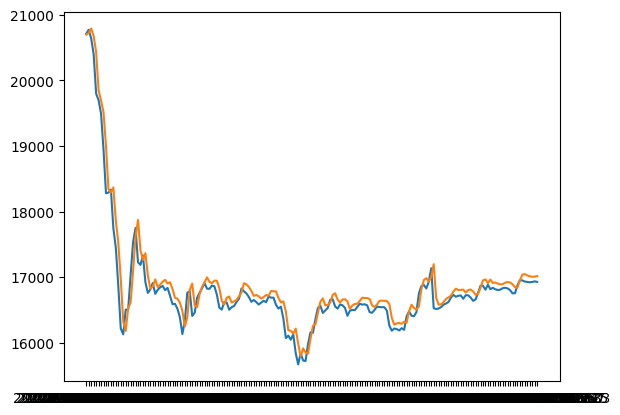

In [58]:
print(x_series_def.shape)
y_pred = mamfmodel.predict(x_test)
y_predict = scaler.inverse_transform(y_pred)
test_predict = scaler.inverse_transform(y_test)
print(x_test.shape)
print(y_pred.shape)
#print(x_plt_test)
plt.plot(cast_time_data(x_plt_test),test_predict)
plt.plot(cast_time_data(x_plt_test),y_predict)
plt.show()

115/115 [==============================] - 0s 3ms/step
(3671,) (3671, 1)


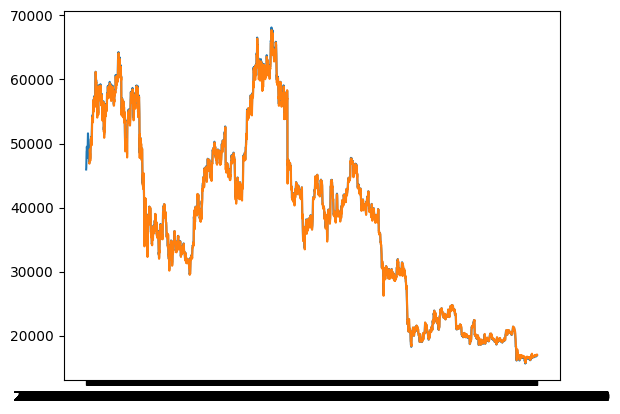

In [53]:
y_pred = mamfmodel.predict(x_series_def)
y_predict = scaler.inverse_transform(y_pred)
x_plot = x[26:]
print(x_plot.shape, y_pred.shape)
plt.plot(cast_time_data(x),y)
plt.plot(cast_time_data(x_plot),y_predict)
plt.show()

1/1 [==============================] - 0s 26ms/step
2023-01-09 00:45:40
[[0.02571768]
 [0.02714644]
 [0.02865987]
 [0.03021043]]


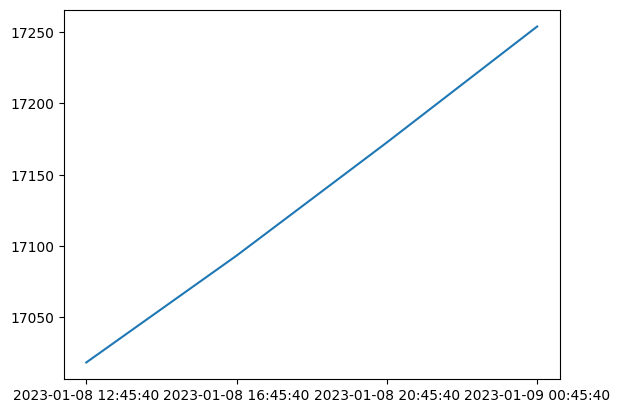

In [57]:
def bracket_list(list):
    new_list = []
    for value in range(len(list)):
        new_value = [list[value]]
        new_list.append(new_value)
    return np.array([new_list])

def predict_next_days(model_ker : tf.keras.models, data , days = 1, hours = 4):
    new_data = data
    last_days = []
    last_series = np.array([data[-1]])
    '''
    pred = mamfmodel.predict(last_series).flatten()
    new_pred_series = np.delete(last_series, 0)
    new_pred_series = np.append(new_pred_series, pred)
    new_pred_series = bracket_list(new_pred_series)
    last_series = new_pred_series
    '''
    for i in range(days*hours):
        pred = model_ker.predict(last_series).flatten()
        new_pred_series = np.delete(last_series, 0)
        new_pred_series = np.append(new_pred_series, pred)
        new_pred_series = bracket_list(new_pred_series)
        last_series = new_pred_series
        last_days.append(pred)
    return np.array(last_days)

def add_days(x_ser, days = 1, hours = 4):
    new_days = []
    new_day = x_ser[-1] #+ 4*60*60*1000
    #range_h = int(24/hours)
    for i in range(days*hours):
        new_days.append(new_day)
        new_day += 4*60*60*1000
    return np.array(new_days)


#print(y_close.shape)
x_next_days = add_days(x, days = 1)
y_next_pred = predict_next_days(mamfmodel, x_series_def , 1)
#new_time = int(str(time_unix)[0:10])
#unixToDatetime = datetime.fromtimestamp(new_time).strftime('%Y-%m-%d %H:%M:%S')
last_day = x_next_days[-1]
last_day = int(str(last_day)[0:10])
last_date = datetime.fromtimestamp(last_day).strftime('%Y-%m-%d %H:%M:%S')
print(last_date)
print(y_next_pred)
plt.plot(cast_time_data(x_next_days),scaler.inverse_transform(y_next_pred))